# import packgaes

In [1]:
!pip install bokeh plotly audiomentations torchaudio

     |████████████████████████████████| 10.7 MB 493 kB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 243 kB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 796 kB/s eta 0:00:01
     |████████████████████████████████| 25.8 MB 528 kB/s eta 0:00:01
     |████████████████████████████████| 804.1 MB 9.5 kB/s eta 0:00:01     |█████████▌                      | 238.4 MB 928 kB/s eta 0:10:10
  Created wheel for bokeh: filename=bokeh-2.3.2-py3-none-any.whl size=11334264 sha256=e3c08ec2f7d1317ed14592d2d6fb4f0cb762ea1dc46407274836601d7f481d6e
  Stored in directory: /root/.cache/pip/wheels/1b/a5/90/f38b6cd80a8276a7203765295ad3da078aa24ff8006096ae49
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=452476dba05ee70da177b314d684705d4c900c7e140bdad9580b42644110fcb5
  Stored in directory: /root/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built bokeh retrying
  Attempting uninstall: scipy
   

In [2]:
import os, pathlib, glob
import numpy as np
import pandas as pd
import bokeh
import seaborn as sns
import plotly
from os import path
import matplotlib.pyplot as plt
import librosa
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import torch
import math
#import torchaudio
import numpy as np
%matplotlib inline
import plotly.express as px
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio, display
import sklearn
import warnings
import gc 
#import torchaudio.functional as F
#import torchaudio.transforms as T
warnings.filterwarnings('ignore')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import matplotlib as mpl
sns.set_style("white")
sns.set_style("ticks")

In [54]:
!ls '/Downloads/Covid/Cough/dat/Coswara-Data-master'

20200413  20200430  20200720  20200919	20210406    README.md
20200415  20200502  20200803  20200930	20210419    combined_data.csv
20200416  20200504  20200814  20201012	20210426    csv_labels_legend.json
20200417  20200505  20200820  20201031	20210507    extract_data.py
20200418  20200525  20200824  20201130	20210523
20200419  20200604  20200901  20201221	20210603
20200424  20200707  20200911  20210206	LICENSE.md


# Part 1. Very basic EDA 

In [78]:
# credit: https://iiscleap.github.io/coswara-blog/coswara/2020/11/23/visualize_coswara_data_metadata.html
# urls for csvs
url_metadata_annotations = '/Downloads/Covid/Cough/dat/coswara/annotation/Annotated_v2_ans.csv'
url_metadata_recordings = '/Downloads/Covid/Cough/dat/Coswara-Data-master/combined_data.csv'

path_audio_data = '/Downloads/Covid/Cough/dat/Coswara-Data-master/'
path_store_figure = './figures/'
fig_save = 0

# load the csvs
df_1 = pd.read_csv(url_metadata_annotations)
df_2 = pd.read_csv(url_metadata_recordings)

In [56]:
df_1

,id,recording,upload_date,vol,cont,quality,stage,annotator_name,start_1,end_1,...,start_17,end_17,start_18,end_18,start_19,end_19,start_20,end_20,start_21,end_21
0,KTaxfghl8TeziY3aZmaNxNFmUqj1,counting-fast_v2,20200824,y,y,bad_audio,counting-fast,rUKbA7AB7OX7qsFhyBlFZUCrOtQ2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KTaxfghl8TeziY3aZmaNxNFmUqj1,counting-normal_v2,20200824,y,y,bad_audio,counting-normal,rUKbA7AB7OX7qsFhyBlFZUCrOtQ2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KTaxfghl8TeziY3aZmaNxNFmUqj1,vowel-o_v2,20200824,y,y,bad_audio,vowel-o,rUKbA7AB7OX7qsFhyBlFZUCrOtQ2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KTaxfghl8TeziY3aZmaNxNFmUqj1,breathing-shallow_v2,20200824,y,y,clean_audio,breathing-shallow,rUKbA7AB7OX7qsFhyBlFZUCrOtQ2,1.452,2.407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KTaxfghl8TeziY3aZmaNxNFmUqj1,breathing-deep_v2,20200824,y,y,bad_audio,breathing-deep,rUKbA7AB7OX7qsFhyBlFZUCrOtQ2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,4drDZUlQcteX5StlFT2CXEL0N0L2,breathing-deep_v2,20200720,y,y,clean_audio,breathing-deep,TnB7TzhYSPMHClGeuw5I81ESI3O2,0.231,2.485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3749,4drDZUlQcteX5StlFT2CXEL0N0L2,cough-heavy_v2,20200720,y,y,clean_audio,cough-heavy,TnB7TzhYSPMHClGeuw5I81ESI3O2,0.685,1.818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3750,4drDZUlQcteX5StlFT2CXEL0N0L2,cough-shallow_v2,20200720,y,y,clean_audio,cough-shallow,TnB7TzhYSPMHClGeuw5I81ESI3O2,0.629,1.203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3751,4drDZUlQcteX5StlFT2CXEL0N0L2,vowel-a_v2,20200720,y,y,clean_audio,vowel-a,TnB7TzhYSPMHClGeuw5I81ESI3O2,0.992,1.707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_2

,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,smoker,...,ihd,bd,st,ftg,mp,loss_of_smell,cld,test_status,diarrhoea,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,y,male,India,Anantapur,Andhra Pradesh,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,y,male,India,BENGALURU URBAN,Karnataka,n,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,y,female,United States,Pittsburgh,Pennsylvania,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,y,male,India,Bangalore,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,y,male,India,Nalanda,Bihar,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,aH6o5lYN6vh40RCFhfyBYjkQVH13,33,healthy,y,male,India,24pgs,West Bengal,n,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,NaN,NaN
1768,hRMSJF9xD6h9CmQJzB3phXKNnTI2,42,recovered_full,y,male,India,Bangalore,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,p,NaN,NaN
1769,ZNTuppbDaCNybeDYGmyjJeYr93s1,27,healthy,y,female,India,NaN,Karnataka,n,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,na,NaN,NaN
1770,J7R2UkId7jU0aOSw5amaS8zJVIm1,37,healthy,y,male,India,NaN,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,na,NaN,NaN


# Distribute numbers of cases

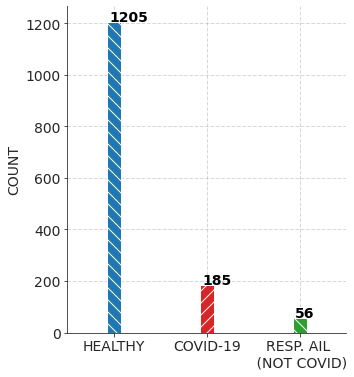

In [49]:
#collapse
##### init path to list
path_to_lists = '/Downloads/Covid/Cough/dat/Coswara-Data-master/coswara/'
#####

DF_more = DF.replace('None', np.nan)
DF_more = DF.replace(np.nan, False)
DF_more['healthy'] = False
DF_more['covid'] = 0.0
DF_more['unhealthy_but_no_covid'] = False

for i in range(len(DF_more)):
    # healthy
    if (DF_more.at[i,'covid_status']=='healthy') & (DF_more.at[i,'asthma']==False) &\
    (DF_more.at[i,'cld']==False) & (DF_more.at[i,'cold']==False) &\
    (DF_more.at[i,'cough']==False) & (DF_more.at[i,'pneumonia']==False) &\
    (DF_more.at[i,'fever']==False):
        DF_more.at[i,'healthy'] = True
        
    # covid
    if (DF_more.at[i,'covid_status']=='positive_asymp'):
        DF_more.at[i,'covid'] = 1
        
    if (DF_more.at[i,'covid_status']=='positive_mild'):
        DF_more.at[i,'covid'] = 2

    if (DF_more.at[i,'covid_status']=='positive_moderate'):
        DF_more.at[i,'covid'] = 3

    # unhealthy but not covid
    if (DF_more.at[i,'covid_status']=='resp_illness_not_identified') & ((DF_more.at[i,'asthma']==True) |\
    (DF_more.at[i,'cld']==True) | (DF_more.at[i,'cold']==True) |\
    (DF_more.at[i,'cough']==True) | (DF_more.at[i,'pneumonia']==True)):
        DF_more.at[i,'unhealthy_but_no_covid'] = True
        
health_categories_cnt_all = []

# get healthy
health_categories_cnt_all.append(len(DF_more[(DF_more['healthy']==True)]))

# get covid
health_categories_cnt_all.append(len(DF_more[(DF_more['covid']>0)]))

# get resp. ail.
health_categories_cnt_all.append(len(DF_more[(DF_more['unhealthy_but_no_covid']==True)]))


clr = ['tab:blue','tab:red','tab:green']

fig, ax = plt.subplots(figsize=(5, 6))
ax.bar(2, health_categories_cnt_all[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr[0],width=.3)
ax.bar(4, health_categories_cnt_all[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr[1],width=.3)
ax.bar(6, health_categories_cnt_all[2], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr[2],width=.3)

plt.xticks([2,4,6],['HEALTHY','COVID-19','RESP. AIL \n (NOT COVID)'],rotation=0,fontsize=14)
for i, v in enumerate(health_categories_cnt_all):
    ax.text(2*(i+1)-.1,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(1,7)
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_metadata_country.pdf", bbox_inches='tight')
plt.show()


# Distribute cases following gender

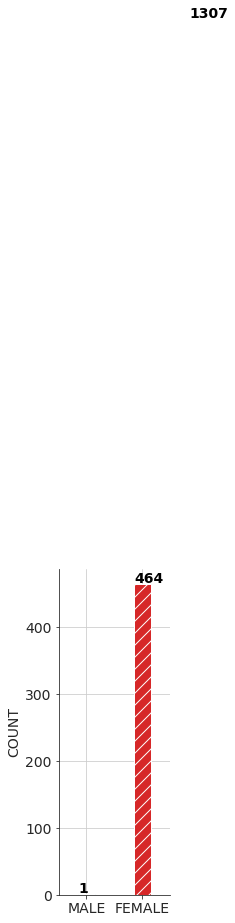

In [50]:
DF = df_2.copy()
# plot gender
gender_labels = DF['g'].unique()[::-1]
gender_cnt = []
for i in range(len(gender_labels)):
    gender_cnt.append(len(DF[(DF['g'] == gender_labels[i])]))# & (DF['recording']=='breathing-deep')]))

clr_1 = 'tab:blue'
clr_2 = 'tab:red'
fig, ax = plt.subplots(figsize=(2, 6))
ax.bar(2,gender_cnt[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr_1,width=.6)
ax.bar(4,gender_cnt[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr_2,width=.6)

for i, v in enumerate(gender_cnt):
    ax.text(2*(i+1)-.3,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
plt.xticks([2,4], ['MALE','FEMALE'],rotation=0)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim(1,5)
# ax.set_ylim(200,1500)
ax.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
# ax.figure.savefig(path_store_figure+"IS2020_coswara_metadata_gender.pdf", bbox_inches='tight')
plt.show()

# Distribute cases based on gender and age groups

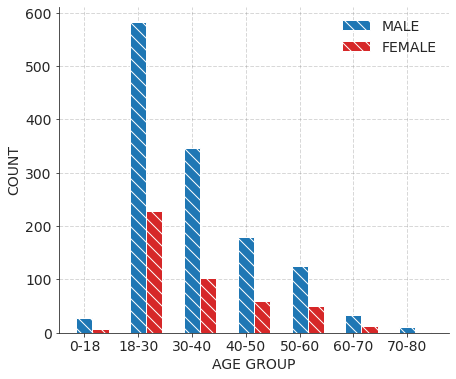

In [51]:
# plot age
age_labels = DF['a'].unique()
age_cnt_male = []
age_cnt_female = []
for i in range(len(age_labels)):
    if age_labels[i] == 'X':
        age_labels[i] = 0
    age_cnt_male.append(len(DF[(DF['a'] == age_labels[i])  & (DF['g']=='male')]))
    age_cnt_female.append(len(DF[(DF['a'] == age_labels[i]) & (DF['g']=='female')]))

age_cnt_male = DF[(DF['g']=='male')]['a'].values
age_cnt_female = DF[(DF['g']=='female')]['a'].values

age_labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80']

age_grouped_male = []
age_grouped_female = []

for i in age_labels:
    age_grouped_male.append(len(age_cnt_male[(age_cnt_male > (int(i.split('-')[0])-1)) & \
                                        (age_cnt_male < int(i.split('-')[1]))]))
    age_grouped_female.append(len(age_cnt_female[(age_cnt_female > (int(i.split('-')[0])-1)) & \
                                        (age_cnt_female < int(i.split('-')[1]))]))
clr_1 = 'tab:blue'
clr_2 = 'tab:red'

fig, ax = plt.subplots(figsize=(7, 6))
ax.bar(np.arange(0,len(age_labels)),age_grouped_male, align='center',alpha=1,hatch="\\\\",ecolor='black',capsize=5,color=clr_1,width=.3,label='MALE')
ax.bar(np.arange(0,len(age_labels))+.3,age_grouped_female, align='center',alpha=1,hatch="\\\\",ecolor='black',capsize=5,color=clr_2,width=.3,label='FEMALE')
ax.legend(frameon=False,loc='upper right',fontsize=14)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('AGE GROUP', fontsize=14)
plt.xticks(np.arange(0,len(age_labels)), age_labels,rotation=0,fontsize=14)
plt.yticks(fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_coswara_metadata_age.pdf", bbox_inches='tight')
plt.show()

# Distribute cases based on locations

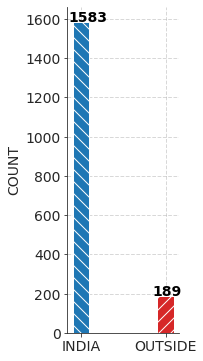

In [16]:
country_labels = DF['l_c'].unique()
country_cnt = []
for i in range(len(country_labels)):
    country_cnt.append(len(DF[(DF['l_c'] == country_labels[i])]))
country_cnt = np.array(country_cnt)
indx = np.argsort(country_cnt)[::-1]
country_cnt = country_cnt[indx]
country_labels = country_labels[indx]
two_categories = [country_cnt[0],np.sum(country_cnt[1:])]
two_labels = ['INDIA','OUTSIDE']

fig, ax = plt.subplots(figsize=(2, 6))
ax.bar(2,two_categories[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr_1,width=.4)
ax.bar(4,two_categories[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr_2,width=.4)
plt.xticks([2,4],two_labels,rotation=0,fontsize=14)
for i, v in enumerate(two_categories):
    ax.text(2*(i+1)-.3,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_metadata_country.pdf", bbox_inches='tight')
plt.show()

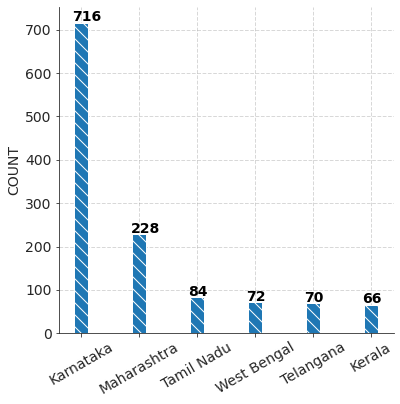

In [17]:
#collapse
# plot state
state_labels = DF['l_s'].unique()
state_cnt = []
for i in range(len(state_labels)):
    state_cnt.append(len(DF[(DF['l_s'] == state_labels[i])]))
state_cnt = np.array(state_cnt)
indx = np.argsort(state_cnt)[::-1][0:6]
state_cnt = state_cnt[indx]
state_labels = state_labels[indx]
    

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(np.arange(0,len(state_cnt)),state_cnt, align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr_1,width=.25)
ax.set_ylabel('COUNT',fontsize=14)
# # ax.text(1.5,-9,'MEAN',horizontalalignment='center')
plt.xticks(np.arange(0,len(state_cnt)),state_labels,rotation=30,fontsize=14)
plt.yticks(fontsize=14)
for i, v in enumerate(state_cnt):
    ax.text(i-.15,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_metadata_state.pdf", bbox_inches='tight')
plt.show()

# Part 2. More detailed EDA

In [144]:
!ls "/Downloads/Covid/Cough/dat/coswara/annotation/"

20200525  20200720  20200820  20200911	20201012
20200604  20200803  20200824  20200919	Annotated_v2_ans.csv
20200707  20200814  20200901  20200930


In [161]:
df_ann = pd.read_csv("/Downloads/Covid/Cough/dat/coswara/annotation/Annotated_v2_ans.csv")
df_ann

,id,recording,upload_date,vol,cont,quality,stage,annotator_name,start_1,end_1,...,start_17,end_17,start_18,end_18,start_19,end_19,start_20,end_20,start_21,end_21
0,KTaxfghl8TeziY3aZmaNxNFmUqj1,counting-fast_v2,20200824,y,y,bad_audio,counting-fast,rUKbA7AB7OX7qsFhyBlFZUCrOtQ2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KTaxfghl8TeziY3aZmaNxNFmUqj1,counting-normal_v2,20200824,y,y,bad_audio,counting-normal,rUKbA7AB7OX7qsFhyBlFZUCrOtQ2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KTaxfghl8TeziY3aZmaNxNFmUqj1,vowel-o_v2,20200824,y,y,bad_audio,vowel-o,rUKbA7AB7OX7qsFhyBlFZUCrOtQ2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KTaxfghl8TeziY3aZmaNxNFmUqj1,breathing-shallow_v2,20200824,y,y,clean_audio,breathing-shallow,rUKbA7AB7OX7qsFhyBlFZUCrOtQ2,1.452,2.407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KTaxfghl8TeziY3aZmaNxNFmUqj1,breathing-deep_v2,20200824,y,y,bad_audio,breathing-deep,rUKbA7AB7OX7qsFhyBlFZUCrOtQ2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,4drDZUlQcteX5StlFT2CXEL0N0L2,breathing-deep_v2,20200720,y,y,clean_audio,breathing-deep,TnB7TzhYSPMHClGeuw5I81ESI3O2,0.231,2.485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3749,4drDZUlQcteX5StlFT2CXEL0N0L2,cough-heavy_v2,20200720,y,y,clean_audio,cough-heavy,TnB7TzhYSPMHClGeuw5I81ESI3O2,0.685,1.818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3750,4drDZUlQcteX5StlFT2CXEL0N0L2,cough-shallow_v2,20200720,y,y,clean_audio,cough-shallow,TnB7TzhYSPMHClGeuw5I81ESI3O2,0.629,1.203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3751,4drDZUlQcteX5StlFT2CXEL0N0L2,vowel-a_v2,20200720,y,y,clean_audio,vowel-a,TnB7TzhYSPMHClGeuw5I81ESI3O2,0.992,1.707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df.describe()

,upload_date,start_1,end_1,start_2,end_2,start_3,end_3,start_4,end_4,start_5,...,start_17,end_17,start_18,end_18,start_19,end_19,start_20,end_20,start_21,end_21
count,3.753000e+03,3410.000000,3410.000000,1549.000000,1549.000000,1351.000000,1351.000000,832.000000,832.000000,663.000000,...,23.000000,23.000000,22.000000,22.000000,21.000000,21.000000,16.000000,16.00000,1.000,1.000
mean,2.020079e+07,1.144204,6.127020,3.438492,4.638607,4.789591,5.823414,6.637907,7.803650,8.321813,...,16.064913,16.804348,17.010727,17.752909,18.237238,18.973190,19.591375,20.33775,17.543,18.169
std,1.277218e+02,0.767935,5.066876,2.400442,3.140740,2.602113,3.169337,3.472906,4.139027,4.448745,...,3.358308,3.521499,3.686406,3.732615,3.841365,4.032652,4.555596,4.77037,NaN,NaN
min,2.020052e+07,-0.017000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715000,1.339000,0.457000,...,10.200000,10.757000,10.903000,11.379000,11.605000,12.042000,12.267000,12.69100,17.543,18.169
25%,2.020071e+07,0.738000,2.114500,1.988000,2.696000,3.059500,3.695500,4.164000,4.911000,5.082000,...,14.056500,14.533500,14.821250,15.359250,15.710000,16.143000,16.610000,17.27375,17.543,18.169
50%,2.020081e+07,0.987000,4.165500,2.762000,3.758000,4.218000,5.073000,5.690500,6.653000,7.009000,...,16.254000,16.745000,16.775500,17.819000,18.632000,19.484000,19.890000,20.76400,17.543,18.169
75%,2.020090e+07,1.356000,8.891250,3.835000,5.355000,5.727000,6.876000,8.338000,10.049250,10.729000,...,18.088000,18.922500,19.473500,20.184500,20.849000,21.385000,21.982250,22.94775,17.543,18.169
max,2.020101e+07,16.800000,29.940000,23.052000,28.238000,21.973000,25.068000,25.034000,29.777000,28.717000,...,23.687000,24.708000,25.248000,26.149000,26.719000,27.800000,28.393000,29.55000,17.543,18.169


In [46]:
df_com = pd.read_csv('/Downloads/Covid/Cough/dat/Coswara-Data-master/combined_data.csv')
df_com

,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,smoker,...,ihd,bd,st,ftg,mp,loss_of_smell,cld,test_status,diarrhoea,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,y,male,India,Anantapur,Andhra Pradesh,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,y,male,India,BENGALURU URBAN,Karnataka,n,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,y,female,United States,Pittsburgh,Pennsylvania,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,y,male,India,Bangalore,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,y,male,India,Nalanda,Bihar,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,aH6o5lYN6vh40RCFhfyBYjkQVH13,33,healthy,y,male,India,24pgs,West Bengal,n,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,NaN,NaN
1768,hRMSJF9xD6h9CmQJzB3phXKNnTI2,42,recovered_full,y,male,India,Bangalore,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,p,NaN,NaN
1769,ZNTuppbDaCNybeDYGmyjJeYr93s1,27,healthy,y,female,India,NaN,Karnataka,n,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,na,NaN,NaN
1770,J7R2UkId7jU0aOSw5amaS8zJVIm1,37,healthy,y,male,India,NaN,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,na,NaN,NaN


In [7]:
df_com.describe(include=['O'])

,id,covid_status,ep,g,l_c,l_l,l_s,rU,smoker,cold,...,ihd,bd,st,ftg,mp,loss_of_smell,cld,test_status,diarrhoea,pneumonia
count,1772,1772,1772,1772,1772,1553,1772,1092,123,117,...,9,47,75,63,57,47,8,359,6,8
unique,1772,7,2,3,45,627,137,2,1,1,...,1,1,1,1,1,1,1,3,1,1
top,l6n5YnEHttTxhcwv6q69TcLSpSK2,healthy,y,male,India,Bangalore,Karnataka,n,True,True,...,True,True,True,True,True,True,True,na,True,True
freq,1,1303,1696,1307,1583,207,716,1040,123,117,...,9,47,75,63,57,47,8,153,6,8


In [8]:
print(df_com.columns.values)

['id' 'a' 'covid_status' 'ep' 'g' 'l_c' 'l_l' 'l_s' 'rU' 'smoker' 'cold'
 'ht' 'diabetes' 'fever' 'asthma' 'um' 'cough' 'ihd' 'bd' 'st' 'ftg' 'mp'
 'loss_of_smell' 'cld' 'test_status' 'diarrhoea' 'pneumonia']


In [9]:
df_com.head()

,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,smoker,...,ihd,bd,st,ftg,mp,loss_of_smell,cld,test_status,diarrhoea,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,y,male,India,Anantapur,Andhra Pradesh,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,y,male,India,BENGALURU URBAN,Karnataka,n,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,y,female,United States,Pittsburgh,Pennsylvania,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,y,male,India,Bangalore,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,y,male,India,Nalanda,Bihar,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1772 non-null   object
 1   a              1772 non-null   int64 
 2   covid_status   1772 non-null   object
 3   ep             1772 non-null   object
 4   g              1772 non-null   object
 5   l_c            1772 non-null   object
 6   l_l            1553 non-null   object
 7   l_s            1772 non-null   object
 8   rU             1092 non-null   object
 9   smoker         123 non-null    object
 10  cold           117 non-null    object
 11  ht             104 non-null    object
 12  diabetes       95 non-null     object
 13  fever          104 non-null    object
 14  asthma         69 non-null     object
 15  um             734 non-null    object
 16  cough          174 non-null    object
 17  ihd            9 non-null      object
 18  bd             47 non-null  

In [190]:
df_com[['covid_status', 'a']].groupby(['covid_status'], as_index=False).mean().sort_values(by='a', ascending=False)

,covid_status,a
4,positive_moderate,42.714286
2,positive_asymp,34.464286
3,positive_mild,34.191176
6,resp_illness_not_identified,33.797753
0,healthy,33.442057
5,recovered_full,33.109091
1,no_resp_illness_exposed,32.471429


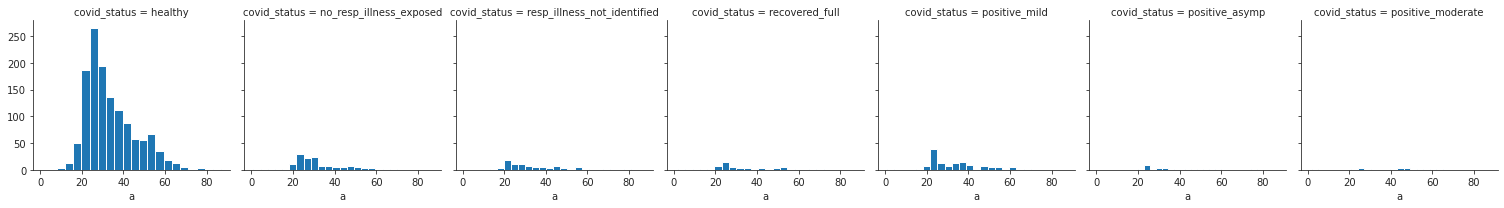

In [197]:
g = sns.FacetGrid(df_com, col='covid_status')
g.map(plt.hist, 'a', bins=20)

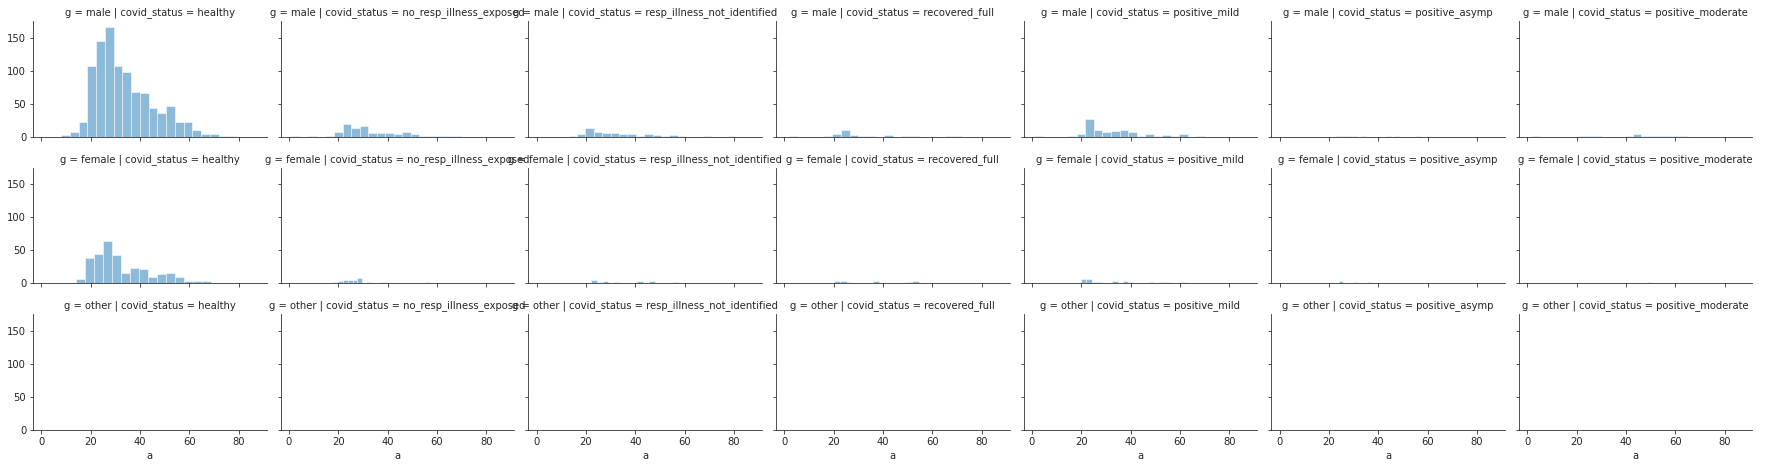

In [199]:
grid = sns.FacetGrid(df_com, col='covid_status', row='g', size=2.2, aspect=1.6)
grid.map(plt.hist, 'a', alpha=.5, bins=20)
grid.add_legend();

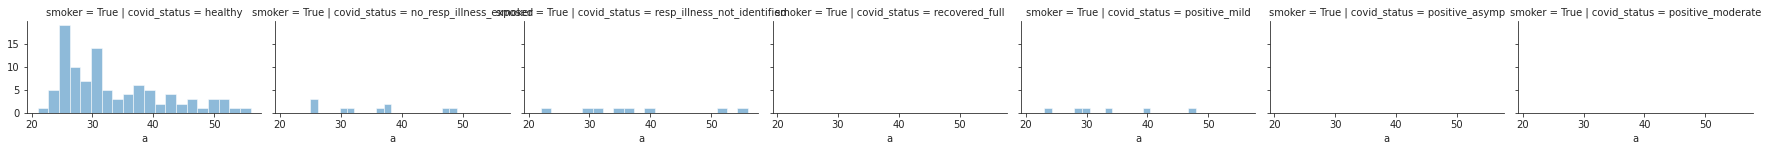

In [200]:
grid = sns.FacetGrid(df_com, col='covid_status', row='smoker', size=2.2, aspect=1.6)
grid.map(plt.hist, 'a', alpha=.5, bins=20)
grid.add_legend();

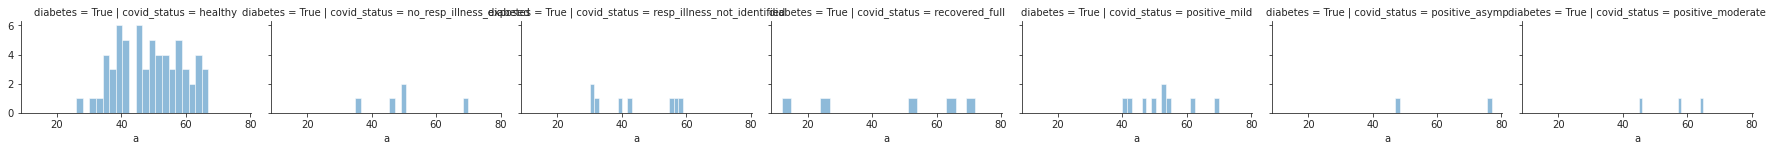

In [201]:
grid = sns.FacetGrid(df_com, col='covid_status', row='diabetes', size=2.2, aspect=1.6)
grid.map(plt.hist, 'a', alpha=.5, bins=20)
grid.add_legend();

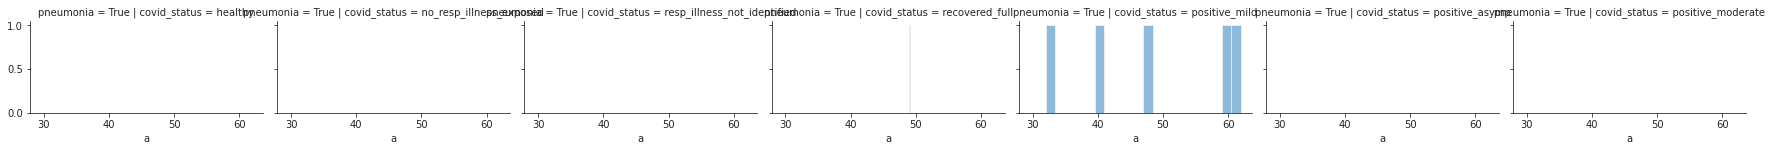

In [202]:
grid = sns.FacetGrid(df_com, col='covid_status', row='pneumonia', size=2.2, aspect=1.6)
grid.map(plt.hist, 'a', alpha=.5, bins=20)
grid.add_legend();

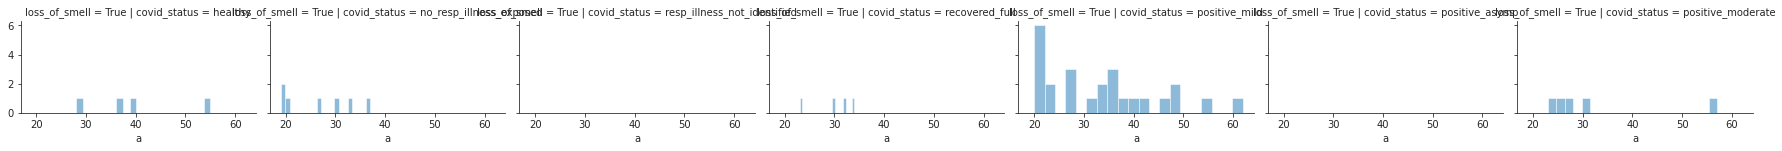

In [203]:
grid = sns.FacetGrid(df_com, col='covid_status', row='loss_of_smell', size=2.2, aspect=1.6)
grid.map(plt.hist, 'a', alpha=.5, bins=20)
grid.add_legend();

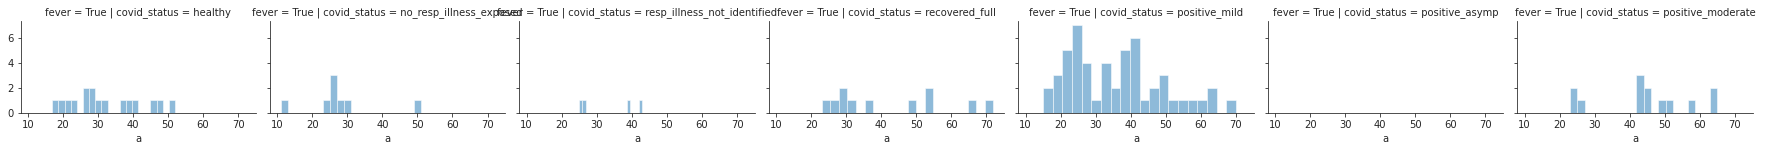

In [205]:
grid = sns.FacetGrid(df_com, col='covid_status', row='fever', size=2.2, aspect=1.6)
grid.map(plt.hist, 'a', alpha=.5, bins=20)
grid.add_legend();

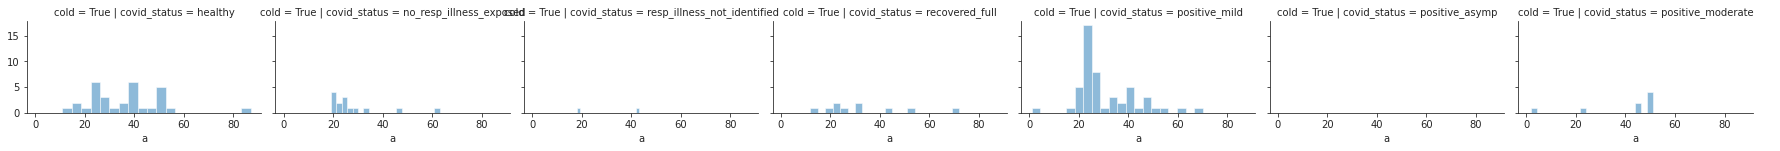

In [206]:
grid = sns.FacetGrid(df_com, col='covid_status', row='cold', size=2.2, aspect=1.6)
grid.map(plt.hist, 'a', alpha=.5, bins=20)
grid.add_legend();

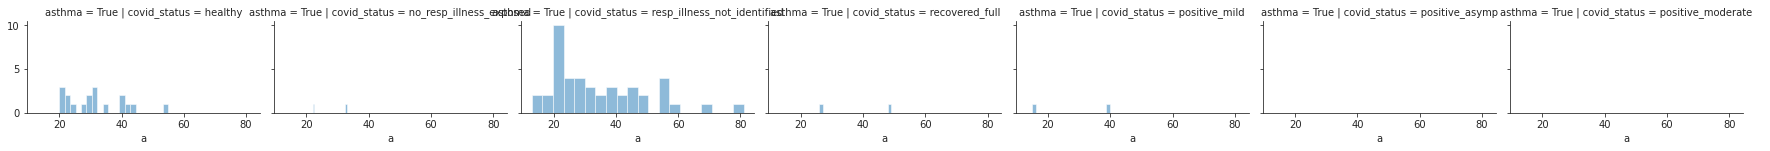

In [207]:
grid = sns.FacetGrid(df_com, col='covid_status', row='asthma', size=2.2, aspect=1.6)
grid.map(plt.hist, 'a', alpha=.5, bins=20)
grid.add_legend();

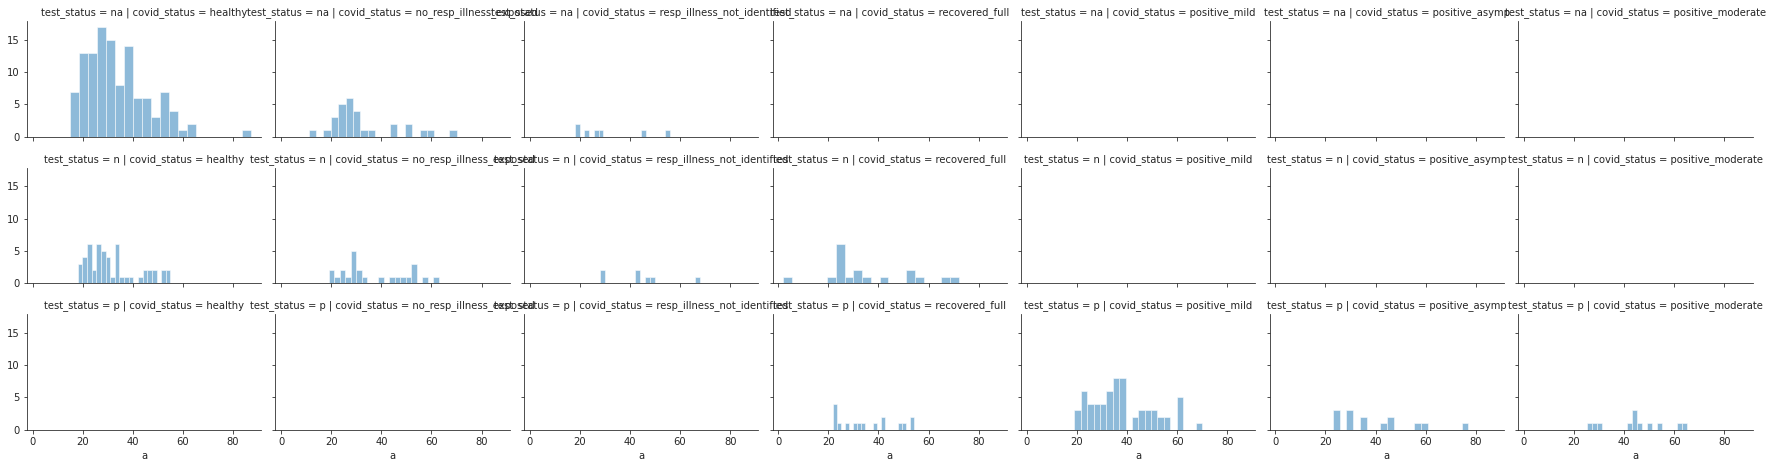

In [208]:
grid = sns.FacetGrid(df_com, col='covid_status', row='test_status', size=2.2, aspect=1.6)
grid.map(plt.hist, 'a', alpha=.5, bins=20)
grid.add_legend();

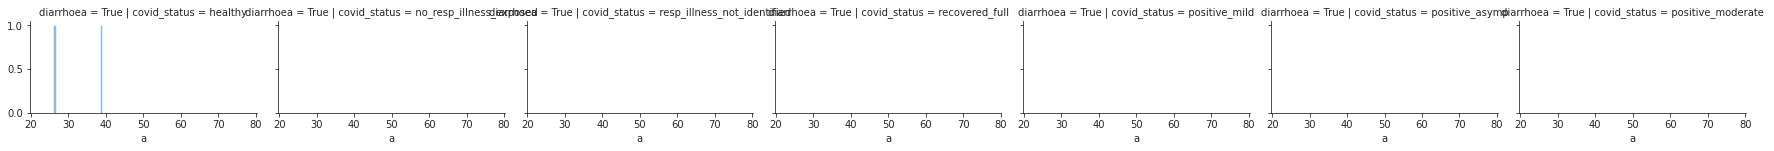

In [209]:
grid = sns.FacetGrid(df_com, col='covid_status', row='diarrhoea', size=2.2, aspect=1.6)
grid.map(plt.hist, 'a', alpha=.5, bins=20)
grid.add_legend();

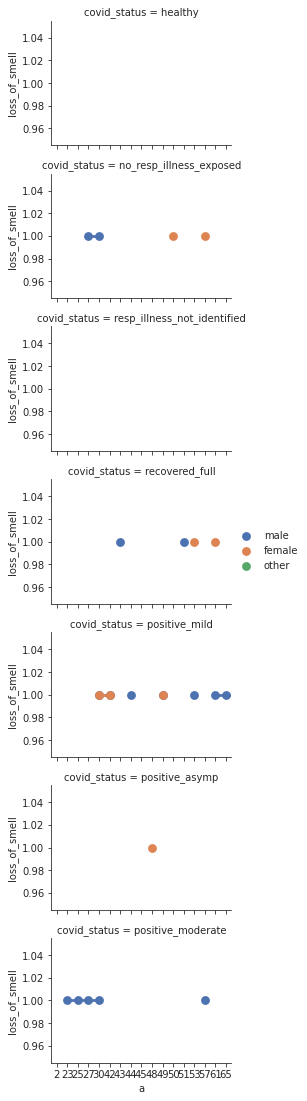

In [4]:
grid = sns.FacetGrid(df_com, row='covid_status', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'a', 'loss_of_smell', 'g', palette='deep')
grid.add_legend()

In [31]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1772 non-null   object
 1   a              1772 non-null   int64 
 2   covid_status   1772 non-null   object
 3   ep             1772 non-null   object
 4   g              1772 non-null   object
 5   l_c            1772 non-null   object
 6   l_l            1553 non-null   object
 7   l_s            1772 non-null   object
 8   rU             1092 non-null   object
 9   smoker         123 non-null    object
 10  cold           117 non-null    object
 11  ht             104 non-null    object
 12  diabetes       95 non-null     object
 13  fever          104 non-null    object
 14  asthma         69 non-null     object
 15  um             734 non-null    object
 16  cough          174 non-null    object
 17  ihd            9 non-null      object
 18  bd             47 non-null  

In [73]:
df_com = pd.read_csv('/Downloads/Covid/Cough/dat/Coswara-Data-master/combined_data.csv')

In [74]:
df_com['pneumonia'] = df_com['pneumonia'].fillna('False').astype(str)
df_com['pneumonia'] = df_com['pneumonia'].map({'False': 0, 'True': 1}).astype(int)

In [75]:
df_com['diabetes'] = df_com['diabetes'].fillna('False').astype(str)
df_com['diabetes'] = df_com['diabetes'].map({'False': 0, 'True': 1}).astype(int)

In [76]:
df_com['smoker'] = df_com['smoker'].fillna('False').astype(str)
df_com['smoker'] = df_com['smoker'].map({'False': 0, 'True': 1}).astype(int)

In [77]:
df_com['fever'] = df_com['fever'].fillna('False').astype(str)
df_com['fever'] = df_com['fever'].map({'False': 0, 'True': 1}).astype(int)

In [78]:
df_com['cold'] = df_com['cold'].fillna('False').astype(str)
df_com['cold'] = df_com['cold'].map({'False': 0, 'True': 1}).astype(int)

In [79]:
df_com['cough'] = df_com['cough'].fillna('False').astype(str)
df_com['cough'] = df_com['cough'].map({'False': 0, 'True': 1}).astype(int)

In [80]:
df_com['asthma'] = df_com['asthma'].fillna('False').astype(str)
df_com['asthma'] = df_com['asthma'].map({'False': 0, 'True': 1}).astype(int)

In [81]:
# p->Positive, n->Negative, na-> Not taken Test, fill na = 'unknown'
df_com['test_status'] = df_com['test_status'].fillna('unknown').astype(str)
df_com['test_status'] = df_com['test_status'].map({'n': 0, 'p': 1, 'na': 2, 'unknown': 3}).astype(int)

In [82]:
df_com['diarrhoea'] = df_com['diarrhoea'].fillna('False').astype(str)
df_com['diarrhoea'] = df_com['diarrhoea'].map({'False': 0, 'True': 1}).astype(int)

In [83]:
df_com['loss_of_smell'] = df_com['loss_of_smell'].fillna('False').astype(str)
df_com['loss_of_smell'] = df_com['loss_of_smell'].map({'False': 0, 'True': 1}).astype(int)

In [84]:
df_com['g'] = df_com['g'].map({'female': 0, 'male': 1})

In [85]:
df_com.loc[df_com['a'] <= 18, 'a'] = 0
df_com.loc[(df_com['a'] > 18) & (df_com['a'] <= 32), 'a'] = 1
df_com.loc[(df_com['a'] > 32) & (df_com['a'] <= 48), 'a'] = 2
df_com.loc[(df_com['a'] > 48) & (df_com['a'] <= 64), 'a'] = 3
df_com.loc[df_com['a'] > 64, 'a'] = 4 ;

In [86]:
df_com['covid_status'] = df_com['covid_status'].map({
                                                     'healthy': 0,
                                                     'no_resp_illness_exposed': 1,
                                                     'positive_asymp': 2,
                                                     'positive_mild': 3,
                                                     'positive_moderate': 4,
                                                      'recovered_full': 5,
                                                    'resp_illness_not_identified':6
                                                      }).astype(int)

In [87]:
df_com.to_csv('/Downloads/Covid/Cough/dat/mod_coswara_metadata.csv')

In [125]:
df = pd.read_csv('/Downloads/Covid/Cough/dat/mod_coswara_metadata.csv')

In [126]:
df.head()

,Unnamed: 0,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,...,ihd,bd,st,ftg,mp,loss_of_smell,cld,test_status,diarrhoea,pneumonia
0,0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,1,0,y,1.0,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,0
1,1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,1,0,y,1.0,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,0
2,2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,1,0,y,0.0,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,0
3,3,YjbEAECMBIaZKyfqOvWy5DDImUb2,1,0,y,1.0,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,0
4,4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,1,0,y,1.0,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,0


In [139]:
df['covid_status'].value_counts()


0    1303
1     140
3     136
6      89
5      55
2      28
4      21
Name: covid_status, dtype: int64

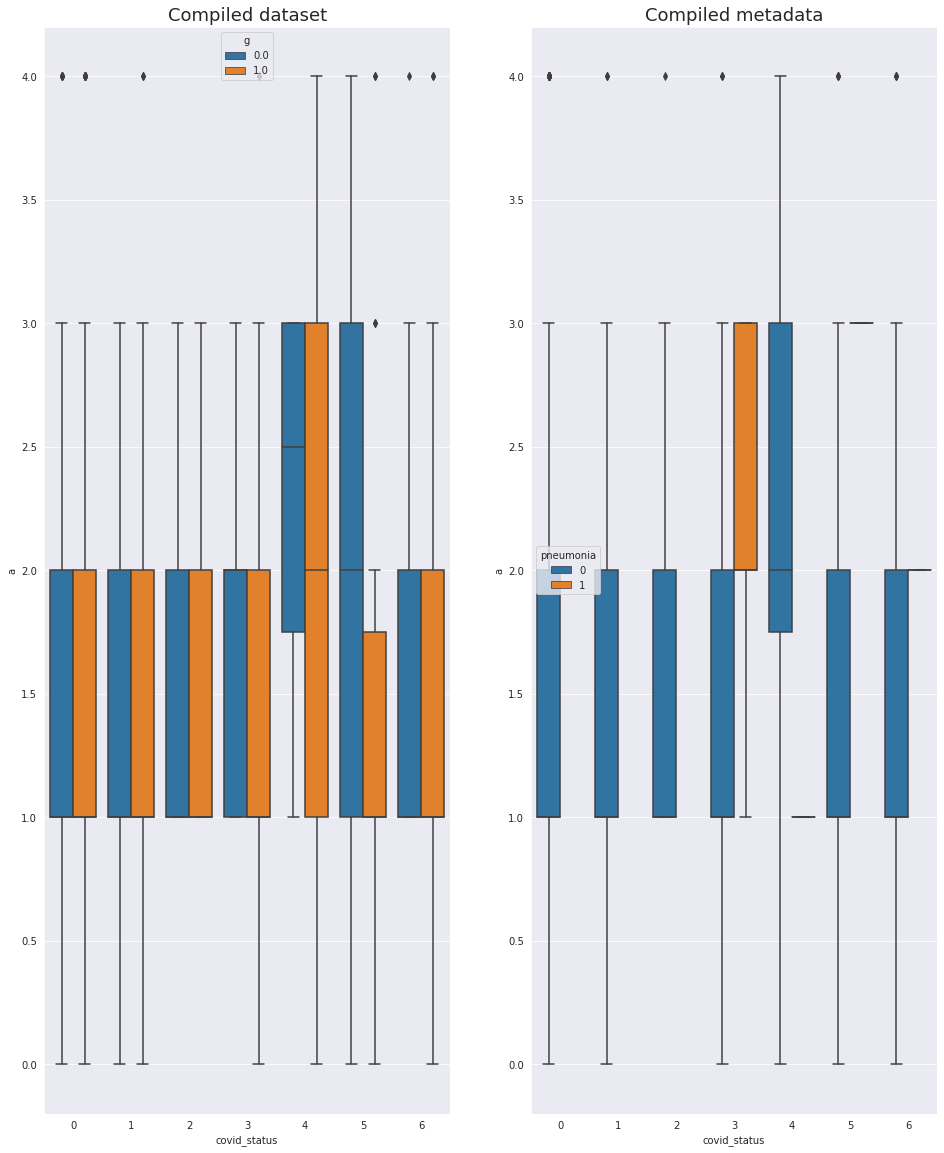

In [94]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,20),ncols=2)
#plt.plot(figsize=(16,20))

ax1 = sns.boxplot(x="covid_status", y="a", hue="g", data=df, ax = ax[0]);
ax1.set_title("Compiled dataset", fontsize = 18)
ax2 = sns.boxplot(x="covid_status", y="a", hue="pneumonia", data=df, ax = ax[1]);
ax2.set_title("Compiled metadata", fontsize = 18)
fig.show()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1772 non-null   int64  
 1   id             1772 non-null   object 
 2   a              1772 non-null   int64  
 3   covid_status   1772 non-null   int64  
 4   ep             1772 non-null   object 
 5   g              1771 non-null   float64
 6   l_c            1772 non-null   object 
 7   l_l            1553 non-null   object 
 8   l_s            1772 non-null   object 
 9   rU             1092 non-null   object 
 10  smoker         1772 non-null   int64  
 11  cold           1772 non-null   int64  
 12  ht             104 non-null    object 
 13  diabetes       1772 non-null   int64  
 14  fever          1772 non-null   int64  
 15  asthma         1772 non-null   int64  
 16  um             734 non-null    object 
 17  cough          1772 non-null   int64  
 18  ihd     

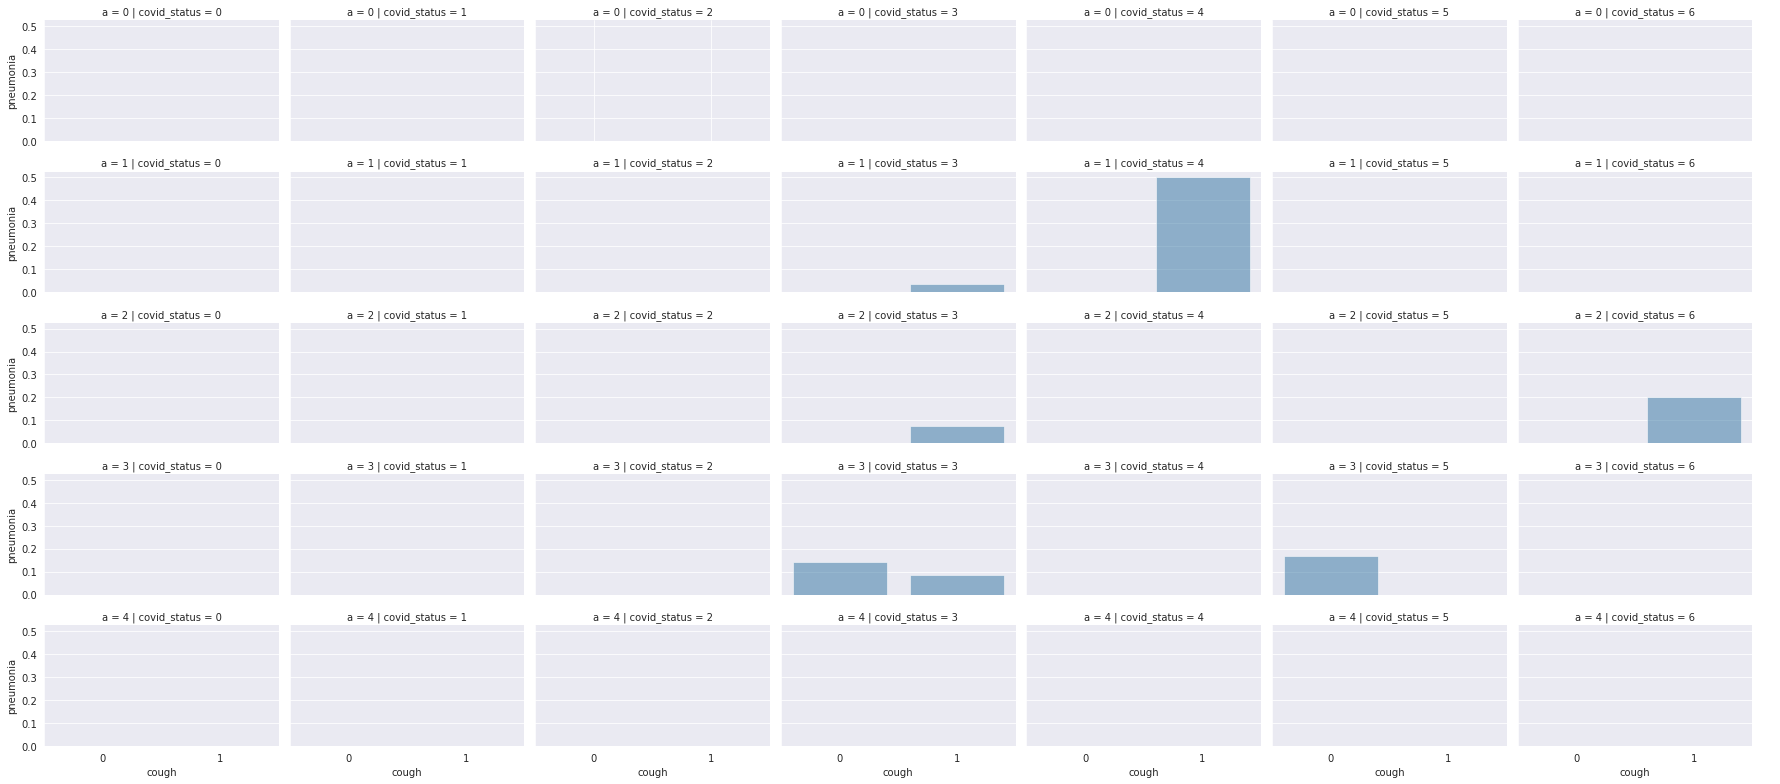

In [103]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='a', col='covid_status', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'cough', 'pneumonia', alpha=.5, ci=None)
grid.add_legend()

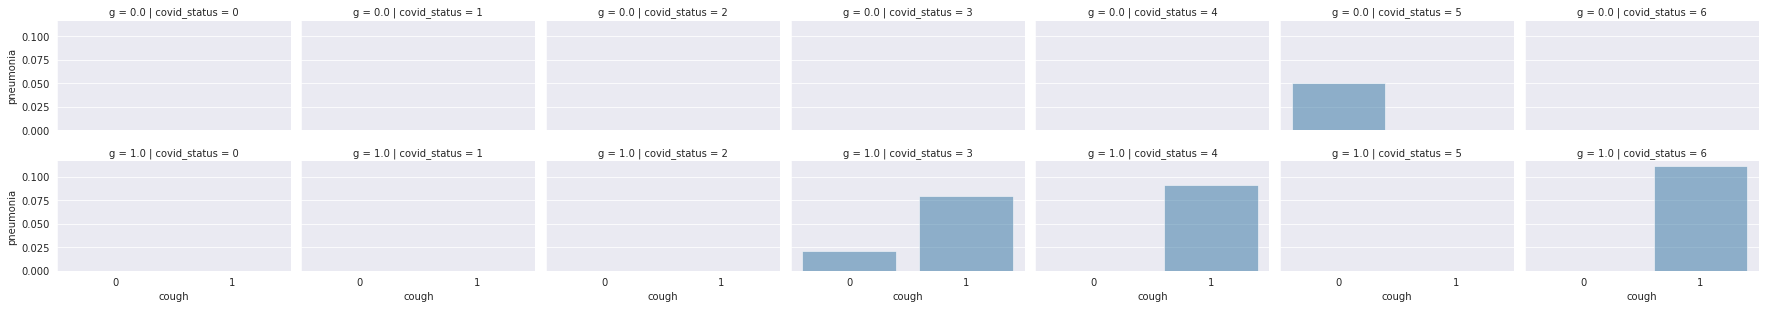

In [102]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='g', col='covid_status', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'cough', 'pneumonia', alpha=.5, ci=None)
grid.add_legend()

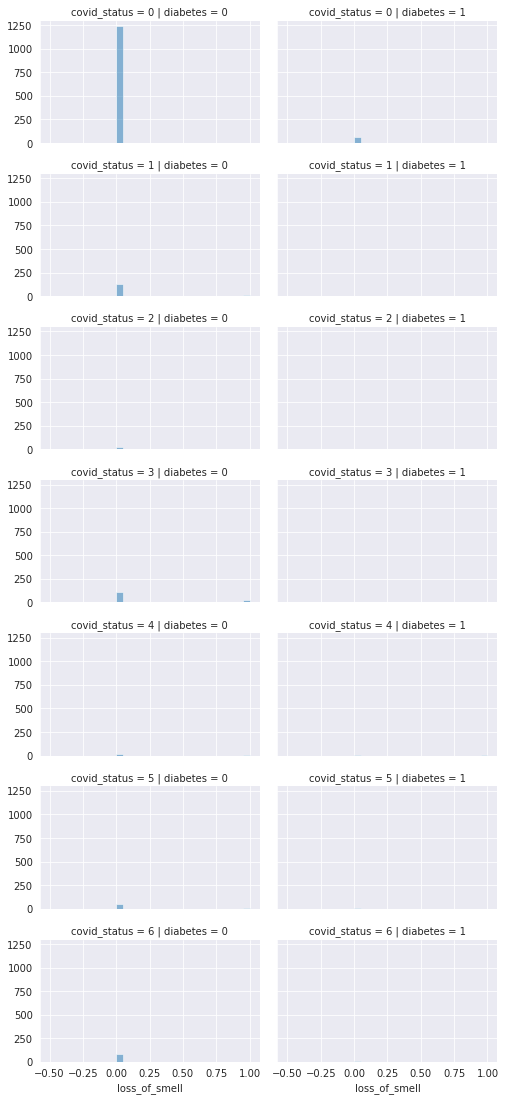

In [105]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(df, row='covid_status', col='diabetes', size=2.2, aspect=1.6)
grid.map(plt.hist, 'loss_of_smell', alpha=.5, bins=20)
grid.add_legend()

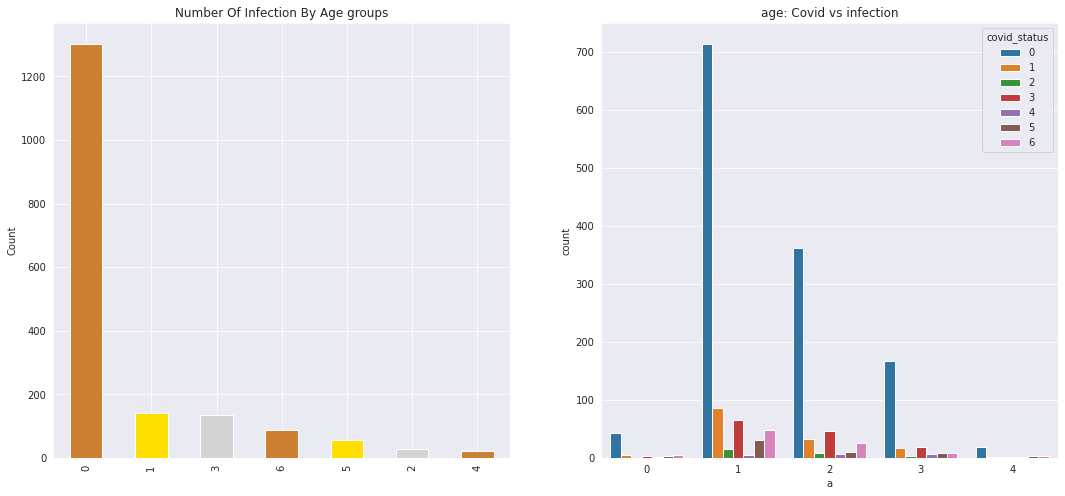

In [110]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['covid_status'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Infection By Age groups')
ax[0].set_ylabel('Count')
sns.countplot('a',hue='covid_status',data=df,ax=ax[1])
ax[1].set_title('age: Covid vs infection')
plt.show()

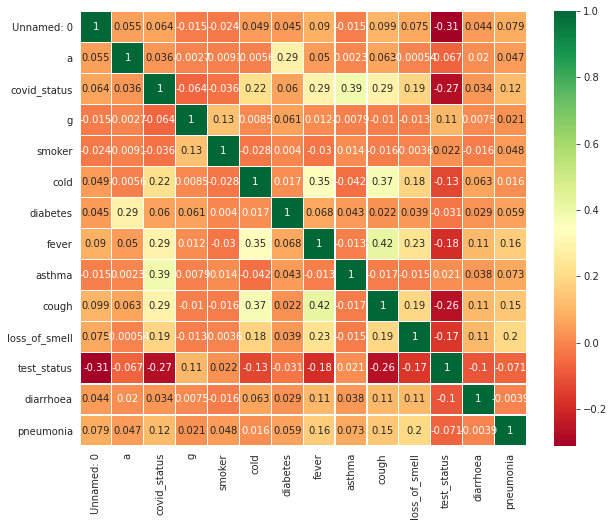

In [111]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [114]:
columns = {"id": "User_ID",
    "a":"Age",
    "covid_status":"Health status",
    "ep":"Proficient_in_English",
    "g":"Gender" ,
    "l_c":"Country",
    "l_l":"Locality",
    "l_s":"State",
    "rU":"Returning User",
    "asthma":"Asthma",
    "cough":"Cough",
    "smoker":"Smoker)",
    "test_status":"Status_of_COVID_Test)",
    "ht":"Hypertension",
    "cold":"Cold",
    "diabetes":"Diabetes",
    "diarrhoea":"Diarrheoa",
    "um":"Using_Mask",
    "ihd":"Ischemic_Heart_Disease",
    "bd":"Breathing_Difficulties",
    "st":"Sore Throat",
    "fever":"Fever)",
    "ftg":"Fatigue)",
    "mp":"Muscle_Pain",
    "loss_of_smell":"Loss_of_Smell_Taste",
    "cld":"Chronic_Lung_Disease",
    "pneumonia":"Pneumonia"}

In [122]:
df_1 = df.rename(columns = columns, inplace=False)

In [123]:
df_1.head()

,Unnamed: 0,User_ID,Age,Health status,Proficient_in_English,Gender,Country,Locality,State,Returning User,...,Ischemic_Heart_Disease,Breathing_Difficulties,Sore Throat,Fatigue),Muscle_Pain,Loss_of_Smell_Taste,Chronic_Lung_Disease,Status_of_COVID_Test),Diarrheoa,Pneumonia
0,0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,1,0,y,1.0,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,0
1,1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,1,0,y,1.0,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,0
2,2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,1,0,y,0.0,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,0
3,3,YjbEAECMBIaZKyfqOvWy5DDImUb2,1,0,y,1.0,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,0
4,4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,1,0,y,1.0,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,0,0


In [124]:
df_1.to_csv('/Downloads/Covid/Cough/dat/coswara/mod_coswara_metadata.csv')